In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Data

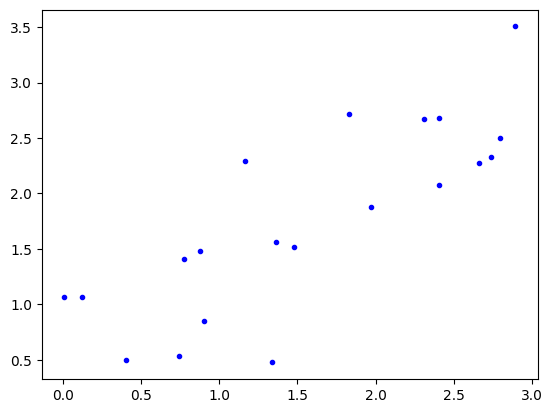

In [2]:
np.random.seed(2025)

m = 20

X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/1.5

plt.plot(X, y, "b.")
plt.show()

# Ridge model and effects of alpha

In [12]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X,y)
ridge_reg.coef_, ridge_reg.intercept_

(array([0.74400415]), array([0.60889622]))

In [15]:
ridge_reg = Ridge(alpha=10000)
ridge_reg.fit(X,y)
ridge_reg.coef_, ridge_reg.intercept_

(array([0.00122327]), array([1.76748155]))

# Lasso

In [14]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X, y)

lasso_reg.coef_, lasso_reg.intercept_

(array([0.]), array([1.7693896]))

# Complicated models

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)

X_poly = poly_features.fit_transform(X)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_poly, y)

ridge_reg.coef_

array([ 0.01844165,  0.02918686,  0.03139013,  0.0289021 ,  0.02355074,
        0.0162231 ,  0.00759459, -0.00141595, -0.00854325,  0.00244644])

In [20]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_poly, y)
lasso_reg.coef_

/Users/jw1412/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+00, tolerance: 1.402e-03
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.93002333e-03,  6.81313629e-03,  0.00000000e+00, -7.30064006e-04,
       -1.97333671e-04,  5.99536053e-05])

In [29]:
# standardize the features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_poly_std = std.fit_transform(X_poly)
X_poly_std

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_std, y)
lasso_reg.coef_

array([0.24031682, 0.34757621, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

# Make pipeline for preprocessing

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

preprocess_pipeline = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler()
)

X_poly_std = preprocess_pipeline.fit_transform(X)

# X_poly_std


# Compare linear regression with Lasso

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly_std, y)


LinearRegression()

In [33]:
X_new = np.linspace(0, 3, 100).reshape(100, 1)

X_new_poly_std = preprocess_pipeline.fit_transform(X_new)

In [35]:
# predicted y using linear regression model
y_pred_lin_reg = lin_reg.predict(X_new_poly_std)

# predicted y using Lasso 
y_pred_lasso = lasso_reg.predict(X_new_poly_std)

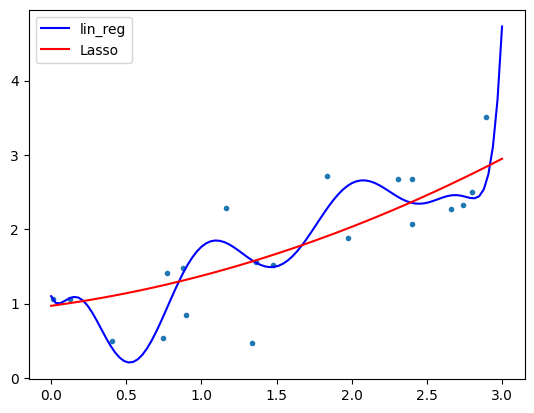

In [41]:
plt.plot(X,y, '.')
plt.plot(X_new, y_pred_lin_reg, "b-", label="lin_reg")
plt.plot(X_new, y_pred_lasso, "r-", label="Lasso")
plt.legend(loc="upper left")
plt.show()

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1, 99, 500, 1000]}
# params = {'alpha': [1, 100, 200, 300, 400, 500]}
# params = {'alpha': [1, 50, 100, 150, 200]} # 50 was chosen
# params = {'alpha': [1, 20, 40, 50, 60, 80, 100]} # 20 was chosen
# params = {'alpha': [1, 5, 15, 20, 30, 40]} # 15 was chosen
# params = {'alpha': [5, 10, 15, 17, 20]} # 15 was chosen
params = {'alpha': [10, 11, 12, 13, 14, 15, 16, 17]}

grid_ridge = GridSearchCV(Ridge(), params, cv=5)

grid_ridge.fit(X_poly_std, y)

grid_ridge.best_params_

{'alpha': 13}

In [55]:
from sklearn.linear_model import ElasticNet

params = {
    'alpha': np.linspace(0.1, 100, 1000), # [1, 10, 20, 50, 100, 1000],
    'l1_ratio': np.linspace(0.01, 0.99, 10) , # [0.05, 0.1, 0.4, 0.6, 0.8, 1]
}

grid_enet = GridSearchCV(ElasticNet(), params, cv=5)

grid_enet.fit(X_poly_std, y)
grid_enet.best_params_

{'alpha': np.float64(0.2), 'l1_ratio': np.float64(0.7722222222222221)}

In [ ]:
# method 1
grid_enet.best_estimator_

In [ ]:
# Method 2
eNet_reg = ElasticNet(alpha=0.2, l1_ratio=0.7722)
eNet_reg.fit(X_poly_std, y)


ElasticNet(alpha=0.2, l1_ratio=0.7722)